# Double pendulum

This code simulates many double pendulums each having slightly
different initial condition to show the butterfly effect.

........................................................................

This program is free software: you can redistribute it and/or modify
it under the terms of the GNU General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU General Public License for more details.

You should have received a copy of the GNU General Public License
along with this program.  If not, see <http://www.gnu.org/licenses/>.

Author: Sudip Sasmal <sudipsasmal.chem@gmail.com>

........................................................................

### Import statement

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

### Functions related to double pendulum

In [2]:
def omega1prime(theta1, theta2, omega1, omega2, m1, m2, l1, l2, g):
    num1 = -g*(2.0*m1+m2)*np.sin(theta1)
    num2 = -m2*g*np.sin(theta1-2.0*theta2)
    num3 = -2.0*np.sin(theta1-theta2)*m2*(np.square(omega2)*l2+np.square(omega1)*l1*np.cos(theta1-theta2))
    den = l1*(2.0*m1+m2-m2*np.cos(2.0*theta1-2.0*theta2))
    res = (num1+num2+num3)/den
    return res


def omega2prime(theta1, theta2, omega1, omega2, m1, m2, l1, l2, g):
    num1 = np.square(omega1)*l1*(m1+m2)
    num2 = g*(m1+m2)*np.cos(theta1)
    num3 = np.square(omega2)*l2*m2*np.cos(theta1-theta2)
    num = 2.0*np.sin(theta1-theta2)*(num1+num2+num3)
    den = l2*(2.0*m1+m2-m2*np.cos(2.0*theta1-2.0*theta2))
    res = num/den
    return res


def rk4omega1(dt, theta1, theta2, omega1, omega2, m1, m2, l1, l2, g):
    k1 = omega1prime(theta1, theta2, omega1, omega2, m1, m2, l1, l2, g)
    val = omega1+dt*k1/2.0
    k2 = omega1prime(theta1, theta2, val, omega2, m1, m2, l1, l2, g)
    val = omega1+dt*k2/2.0
    k3 = omega1prime(theta1, theta2, val, omega2, m1, m2, l1, l2, g)
    val = omega1+dt*k3
    k4 = omega1prime(theta1, theta2, val, omega2, m1, m2, l1, l2, g)
    newomega1 = omega1+dt*(k1/6.0+k2/3.0+k3/3.0+k4/6.0)
    return newomega1


def rk4omega2(dt, theta1, theta2, omega1, omega2, m1, m2, l1, l2, g):
    k1 = omega2prime(theta1, theta2, omega1, omega2, m1, m2, l1, l2, g)
    val = omega2+dt*k1/2.0
    k2 = omega2prime(theta1, theta2, omega1, val, m1, m2, l1, l2, g)
    val = omega2+dt*k2/2.0
    k3 = omega2prime(theta1, theta2, omega1, val, m1, m2, l1, l2, g)
    val = omega2+dt*k3
    k4 = omega2prime(theta1, theta2, omega1, val, m1, m2, l1, l2, g)
    newomega2 = omega2+dt*(k1/6.0+k2/3.0+k3/3.0+k4/6.0)
    return newomega2


def new_theta(dt, theta, omega):
    newtheta = theta+omega*dt
    return newtheta


def get_initial_theta(itheta1, itheta2, npend, dtheta):
    theta1 = np.zeros(npend)
    theta2 = np.zeros(npend)
    for i in range(npend):
        theta1[i] = itheta1+dtheta*i
        theta2[i] = itheta2+dtheta*i
    return theta1, theta2


def next_step(dt, theta1, theta2, omega1, omega2, m1, m2, l1, l2, g):
    newomega1 = rk4omega1(dt, theta1, theta2, omega1, omega2, m1, m2, l1, l2, g)
    newomega2 = rk4omega2(dt, theta1, theta2, omega1, omega2, m1, m2, l1, l2, g)
    newtheta1 = new_theta(dt, theta1, newomega1)
    newtheta2 = new_theta(dt, theta2, newomega2)
    x1, y1, x2, y2 = get_position(l1, l2, newtheta1, newtheta2)
    return x1, y1, x2, y2, newtheta1, newtheta2, newomega1, newomega2


def next_step_all(dt, theta1, theta2, omega1, omega2, m1, m2, l1, l2, g, npend):
    x1 = np.zeros(npend)
    y1 = np.zeros(npend)
    x2 = np.zeros(npend)
    y2 = np.zeros(npend)
    for i in range(npend):
        x1_, y1_, x2_, y2_, theta1_, theta2_, omega1_, omega2_ = next_step(dt, theta1[i], theta2[i],
                                                                           omega1[i], omega2[i],
                                                                           m1, m2, l1, l2, g)
        x1[i] = x1_
        y1[i] = y1_
        x2[i] = x2_
        y2[i] = y2_
        theta1[i] = theta1_
        theta2[i] = theta2_
        omega1[i] = omega1_
        omega2[i] = omega2_
    return x1, y1, x2, y2, theta1, theta2, omega1, omega2


def get_position(l1, l2, theta1, theta2):
    x1 = l1*np.sin(theta1)
    y1 = -l1*np.cos(theta1)
    x2 = x1+l2*np.sin(theta2)
    y2 = y1-l2*np.cos(theta2)
    return x1, y1, x2, y2


def get_position_all(l1, l2, theta1, theta2, npend):
    x1 = np.zeros(npend)
    y1 = np.zeros(npend)
    x2 = np.zeros(npend)
    y2 = np.zeros(npend)
    for i in range(npend):
        x1[i], y1[i], x2[i], y2[i] = get_position(l1, l2, theta1[i], theta2[i])
    return x1, y1, x2, y2


def plot_pendulum(ax, x1, y1, x2, y2, time):
    xvalues1 = [0.0, x1]
    yvalues1 = [0.0, y1]
    xvalues2 = [x1, x2]
    yvalues2 = [y1, y2]
    plt.pause(0.00001)
    ax.clear()
    plt.suptitle('time = '+'{:8.3f}'.format(time))
    ax.set_xlim([-2.0, 2.0])
    ax.set_ylim([-2.5, 1.0])
    ax.scatter(0.0, 0.0, s=20, c='k')
    ax.plot(xvalues1, yvalues1, c='r')
    ax.scatter(x1, y1, s=100, c='r')
    ax.plot(xvalues2, yvalues2, c='b')
    ax.scatter(x2, y2, s=100, c='b')


def plot_pendulum_all(ax, x1, y1, x2, y2, time, npend):
    plt.pause(0.00001)
    ax.clear()
    plt.suptitle('time = '+'{:8.3f}'.format(time))
    ax.set_xlim([-2.2, 2.2])
    ax.set_ylim([-2.5, 2.0])
    cmap1 = mpl.cm.get_cmap('spring')
    cmap2 = mpl.cm.get_cmap('winter')
    for i in range(npend):
        xvalues1 = [0.0, x1[i]]
        yvalues1 = [0.0, y1[i]]
        xvalues2 = [x1[i], x2[i]]
        yvalues2 = [y1[i], y2[i]]
        ax.scatter(0.0, 0.0, s=20, c='k')
        cval = 0.0+float(i/npend)
        ax.plot(xvalues1, yvalues1, color=cmap1(cval))
        ax.plot(xvalues2, yvalues2, color=cmap2(cval))
        ax.plot(x1[i], y1[i], s=100, color=cmap1(cval))
        ax.plot(x2[i], y2[i], s=100, color=cmap2(cval))


def pendulum_time(tfin, dt, l1, l2, m1, m2, g, itheta1, itheta2, npend, dtheta):
    omega1 = np.zeros(npend)
    omega2 = np.zeros(npend)
    npoint = int(tfin/dt)+1
    # fig, ax = plt.subplots()
    x1pos = np.zeros((npoint+1, npend))
    y1pos = np.zeros((npoint+1, npend))
    x2pos = np.zeros((npoint+1, npend))
    y2pos = np.zeros((npoint+1, npend))
    theta1, theta2 = get_initial_theta(itheta1, itheta2, npend, dtheta)
    x1pos[0, :], y1pos[0, :], x2pos[0, :], y2pos[0, :] = get_position_all(l1, l2, theta1, theta2, npend)
    # # x1, y1, x2, y2 = get_position_all(l1, l2, theta1, theta2, npend)
    # # plot_pendulum_all(ax, x1, y1, x2, y2, 0.0, npend)
    for ipoint in range(npoint):
        x1, y1, x2, y2, theta1, theta2, omega1, omega2 = next_step_all(dt, theta1, theta2, omega1, omega2,
                                                                   m1, m2, l1, l2, g, npend)
        # # itime = (ipoint+1)*dt
        x1pos[ipoint+1, :] = x1[:]
        y1pos[ipoint+1, :] = y1[:]
        x2pos[ipoint+1, :] = x2[:]
        y2pos[ipoint+1, :] = y2[:]
        # # plot_pendulum_all(ax, x1, y1, x2, y2, itime, npend)
    # for i in range(npoint+1):
    #     itime = i*dt
    #     plot_pendulum_all(ax, x1pos[i, :], y1pos[i, :], x2pos[i, :], y2pos[i, :], itime, npend)
    # plt.show()
    return x1pos, y1pos, x2pos, y2pos

## Animation

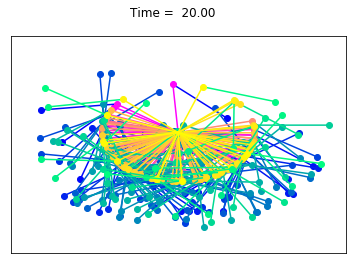

In [5]:
def init_func():
    ax.set_xlim([-2.2, 2.2])
    ax.set_ylim([-2.5, 2.0])
    ax.scatter(0.0, 0.0, s=20, c='k')
    ax.set_xticks([])
    ax.set_yticks([])


def animation_frame(xframe):
    itime = xframe*deltat
    plt.suptitle("Time = " + '{:6.2f}'.format(itime))
    for i in range(npendulum):
        xvalues1 = [0.0, x1pos[xframe, i]]
        yvalues1 = [0.0, y1pos[xframe, i]]
        xvalues2 = [x1pos[xframe, i], x2pos[xframe, i]]
        yvalues2 = [y1pos[xframe, i], y2pos[xframe, i]]
        lp1[i].set_data(xvalues1, yvalues1)
        lp2[i].set_data(xvalues2, yvalues2)
        lp3[i].set_data(x1pos[xframe, i], y1pos[xframe, i])
        lp4[i].set_data(x2pos[xframe, i], y2pos[xframe, i])
    return lp1, lp2, lp3, lp4


init_theta1 = np.pi/2.0
init_theta2 = np.pi/4.0
deltatheta = 0.0001
npendulum = 200
deltat = 0.01
tfinal = 20.0
len1 = 1.0
len2 = 1.0
mass1 = 2.0
mass2 = 2.0
gconst = 9.81

x1pos, y1pos, x2pos, y2pos = pendulum_time(tfinal, deltat, len1, len2, mass1, mass2, gconst,
                                           init_theta1, init_theta2, npendulum, deltatheta)

fig, ax = plt.subplots()
# initializing a line variable
nframe = int(tfinal/deltat)+1
lp1 = np.empty(npendulum, dtype=np.object)
lp2 = np.empty(npendulum, dtype=np.object)
lp3 = np.empty(npendulum, dtype=np.object)
lp4 = np.empty(npendulum, dtype=np.object)
cmap1 = mpl.cm.get_cmap('spring')
cmap2 = mpl.cm.get_cmap('winter')
for ix in range(npendulum):
    cval = 0.0+float(ix/npendulum)
    lp1[ix], = ax.plot([], [], color=cmap1(cval))
    lp2[ix], = ax.plot([], [], color=cmap2(cval))
    lp3[ix], = ax.plot([], [], 'o', color=cmap1(cval))
    lp4[ix], = ax.plot([], [], 'o', color=cmap2(cval))


animation = FuncAnimation(fig, init_func=init_func, frames=nframe, interval=100, repeat=False,
                          func=animation_frame)

animation.save(r'double_pendulum.mp4', dpi=300, fps=30, writer='ffmpeg')
# HTML(animation.to_html5_video())
